In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/Movie-Ratings.csv")
data.columns = ['Film', 'Genre', 'RottenTomatoesRatings', 'AudienceRatings', 'Budget', 'Yearofrelease']
data.Film = data.Film.astype("category")
data.Genre = data.Genre.astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Film                   559 non-null    category
 1   Genre                  559 non-null    category
 2   RottenTomatoesRatings  559 non-null    int64   
 3   AudienceRatings        559 non-null    int64   
 4   Budget                 559 non-null    int64   
 5   Yearofrelease          559 non-null    int64   
dtypes: category(2), int64(4)
memory usage: 40.1 KB


In [3]:
data

,Film,Genre,RottenTomatoesRatings,AudienceRatings,Budget,Yearofrelease
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


# What is the top 10 highest audience ratings movies?

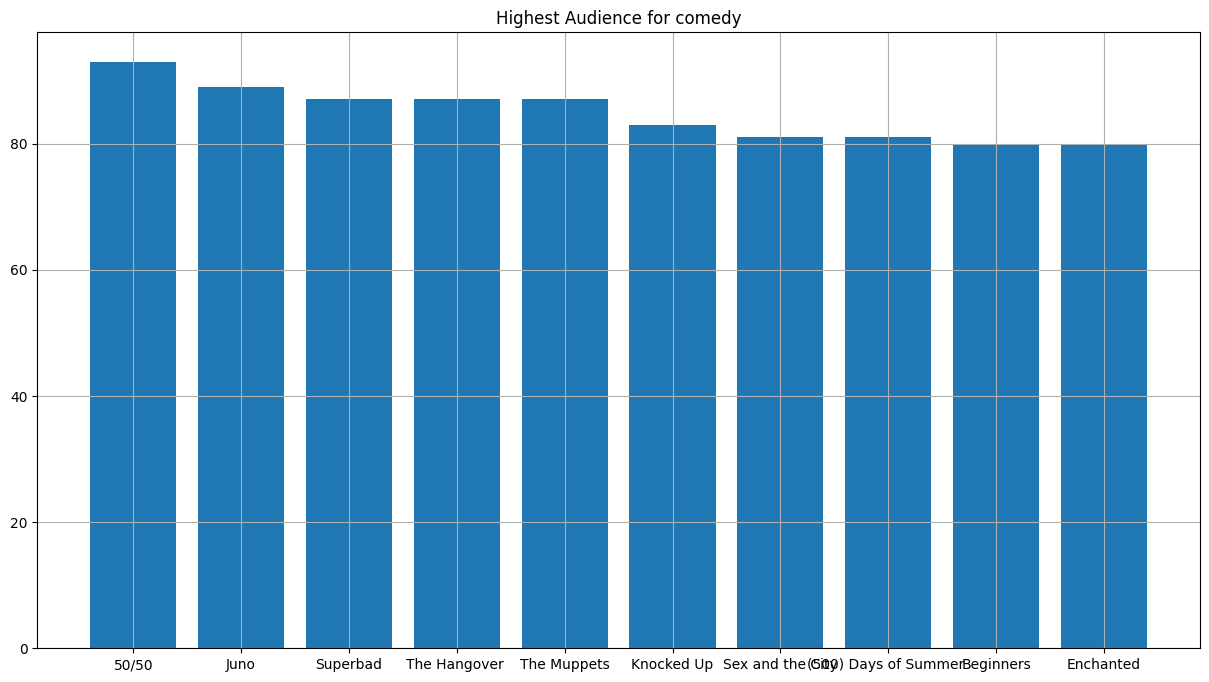

In [4]:
def getData(genre):
    d = data[data.Genre == genre]
    lists = [i for i in d.AudienceRatings]
    title = [i for i in d.Film]

    for i in range(len(lists)):
        for j in range(len(lists)):
            if lists[i] > lists[j]:
                lists[i], lists[j] = lists[j], lists[i]
                title[i], title[j] = title[j], title[i]

    lists = [lists[i] for i in range(10)]
    title = [title[i] for i in range(10)]

    return {
        "title": title,
        "lists": lists
    }

_data = getData("Comedy")
plt.figure(figsize=(15, 8))
plt.grid()
plt.bar(_data['title'], _data['lists'])
plt.title("Highest Audience for comedy")
plt.show()

# What is the most costly genre

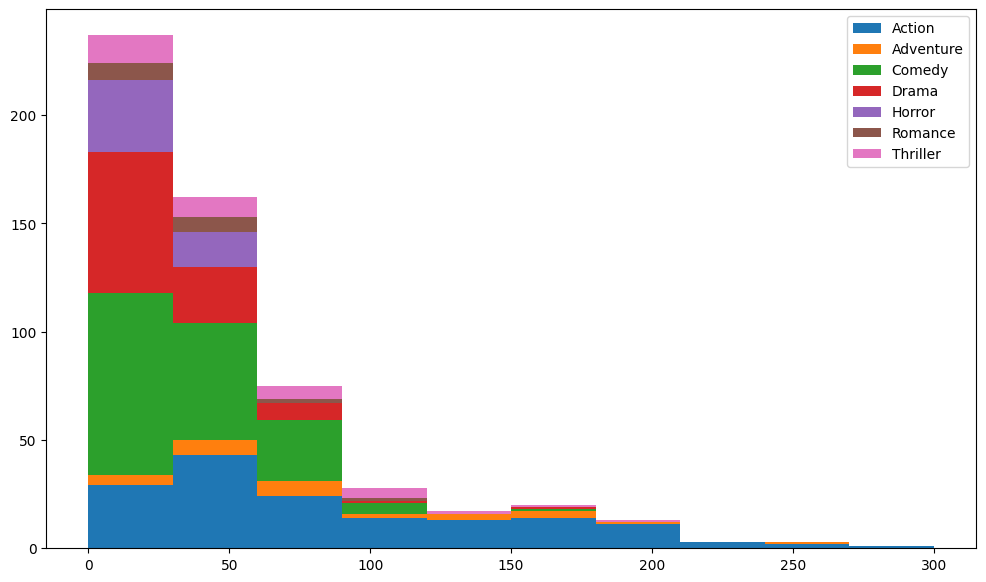

In [5]:
action = data[data.Genre == "Action"]
adventure = data[data.Genre == "Adventure"]
comedy = data[data.Genre == "Comedy"]
drama = data[data.Genre == "Drama"]
horror = data[data.Genre == "Horror"]
romance = data[data.Genre == "Romance"]
thriller = data[data.Genre == "Thriller"]
genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

plt.figure(figsize=(25,8))
plt.hist((action['Budget'], adventure['Budget'], comedy['Budget'], drama['Budget'], horror['Budget'], romance['Budget'], thriller['Budget']), stacked=True)
plt.gcf().set_size_inches(12, 7)
plt.legend(genres)
plt.show()


# Highest rating genre

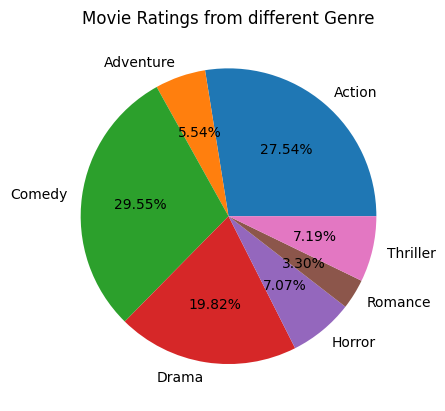

In [6]:

datas = np.sum(action['AudienceRatings']), np.sum(adventure['AudienceRatings']), np.sum(comedy['AudienceRatings']), np.sum(drama['AudienceRatings']), np.sum(horror['AudienceRatings']), np.sum(romance['AudienceRatings']), np.sum(thriller['AudienceRatings'])
legends = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

plt.title("Movie Ratings from different Genre")
plt.pie(datas, labels=legends, autopct="%1.2f%%")
plt.show()


# What is the most watched horror film?

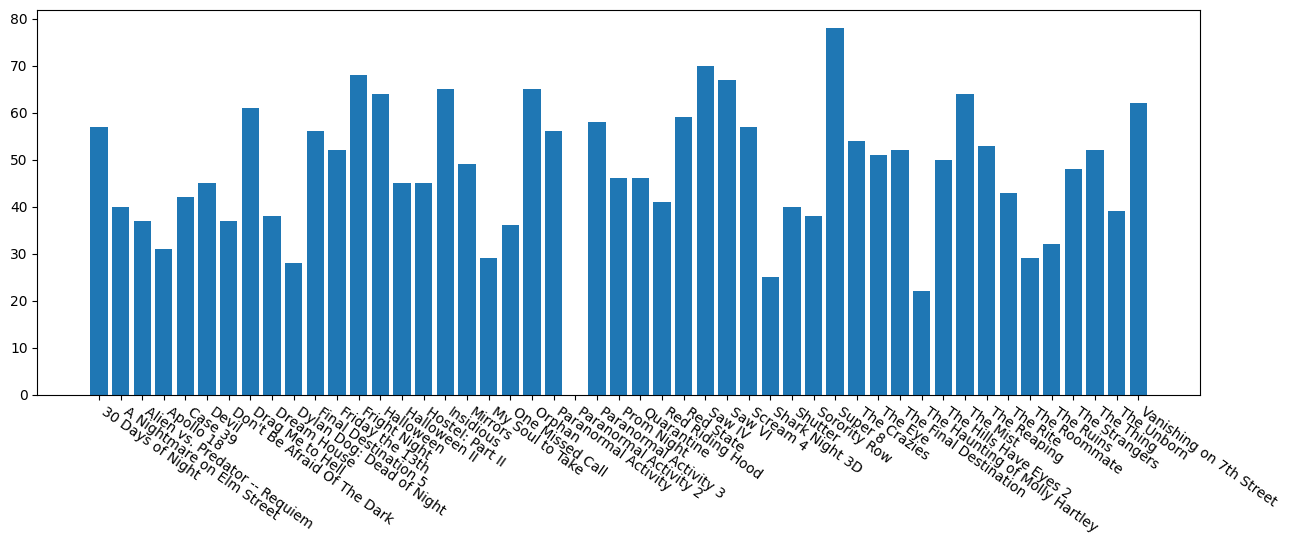

In [7]:
_horror = data[data.Genre == "Horror"]

plt.figure(figsize=(15, 5))
plt.bar(_horror['Film'], _horror['AudienceRatings'])
plt.xticks(rotation=-35, horizontalalignment="left")
plt.show()

# What is the most watched Adventure film?

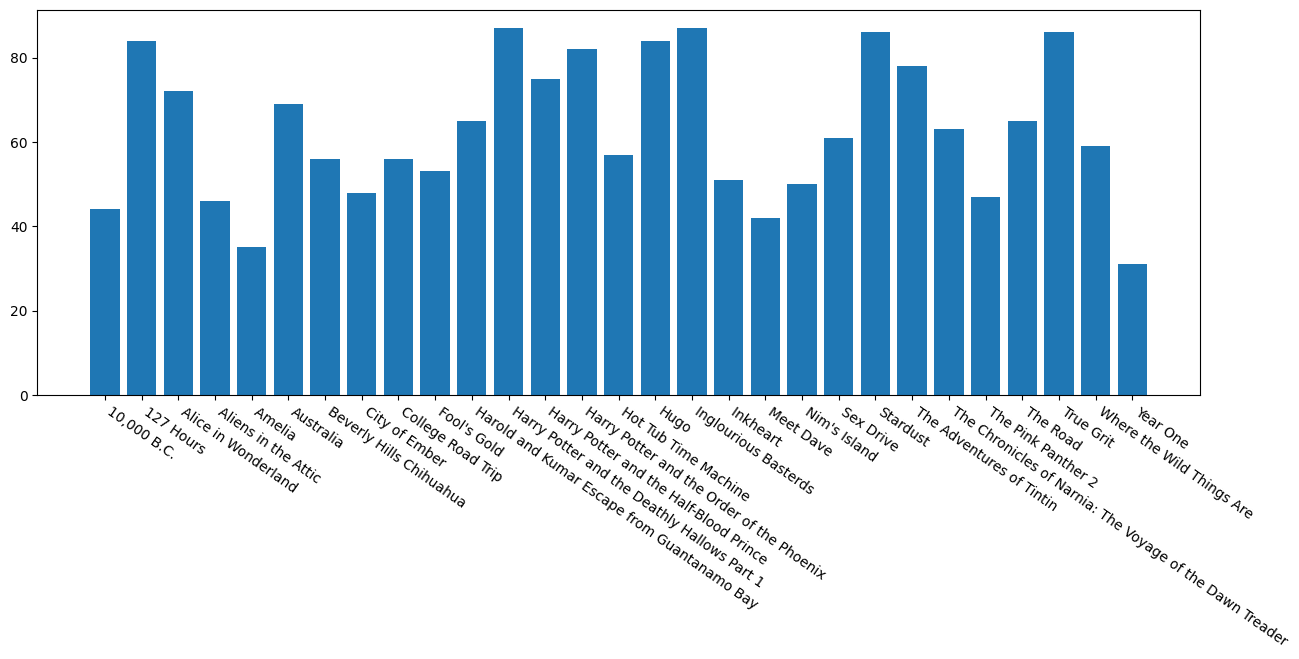

In [10]:
_comedy = data[data.Genre == "Adventure"]

plt.figure(figsize=(15, 5))
plt.bar(_comedy['Film'], _comedy['AudienceRatings'])
plt.xticks(rotation=-35, horizontalalignment="left")
plt.show()